# **QUESTION FORMULATION**

---

## **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from typing import Dict
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## **Load Raw Data**

In [2]:
weather_path = "../data/raw/weatherAUS.csv"
df_weather = pd.read_csv(weather_path)

## **Question 1**

### **1. The question**

*Liệu mối quan hệ giữa sụt giảm áp suất khí quyển trong ngày (Pressure9am − Pressure3pm) và xác suất mưa ngày kế tiếp (`RainTomorrow`) có ổn định trên toàn bộ lãnh thổ Úc, hay hiệu lực dự báo của áp suất phụ thuộc phi tuyến vào trạng thái độ ẩm khí quyển và bối cảnh địa lý (Ven biển so với Nội địa)?*

> *Cụ thể, câu hỏi này nhằm xác định liệu sụt giảm áp suất có thể đóng vai trò như một chỉ báo độc lập cho mưa, hay chỉ trở nên có ý nghĩa dự báo khi vượt qua các ngưỡng tới hạn về độ ẩm (Humidity3pm) và trong những vùng địa lý nhất định.*


### **2. Motivation & Benefits**

#### **2.1. Why is this question worth investigating?**

Mối quan hệ giữa sự sụt giảm áp suất khí quyển và khả năng xuất hiện mưa là một trong những quy luật kinh nghiệm lâu đời nhất trong dự báo thời tiết. Quy luật này thường được ngầm giả định là có hiệu lực phổ quát, bất kể bối cảnh khí hậu hay điều kiện nền của khí quyển. Tuy nhiên, giả định này trở nên đáng nghi ngờ trong bối cảnh Úc — một lục địa có mức độ dị biệt khí hậu rất cao, trải dài từ các vùng ven biển ẩm ướt, nơi hơi nước luôn dồi dào, đến các khu vực nội địa khô hạn rộng lớn, nơi độ ẩm thường là yếu tố hạn chế chính đối với quá trình hình thành mưa.

Trong các vùng nội địa khô hạn, sụt giảm áp suất trong ngày có thể phản ánh sự hình thành các hệ thống nhiệt thấp hoặc thay đổi hoàn lưu gió bề mặt, nhưng không nhất thiết dẫn đến sự ngưng tụ đủ mạnh để tạo mưa. Do đó, việc coi áp suất giảm như một chỉ báo độc lập cho mưa có nguy cơ dẫn đến diễn giải sai bản chất vật lý của hệ thống khí quyển. Khoảng trống này đặt ra một câu hỏi cốt lõi: liệu hiệu lực dự báo của biến thiên áp suất có mang tính tổng quát, hay bị chi phối một cách có hệ thống bởi trạng thái độ ẩm khí quyển và đặc thù địa lý. Việc làm rõ câu hỏi này là cần thiết để tránh các giả định đơn giản hóa quá mức trong phân tích dữ liệu khí tượng và trong các mô hình dự báo mưa.

#### **2.2. What benefits or insights would be answering this question provide?**

Việc trả lời câu hỏi này mang lại những lợi ích quan trọng cả về mặt khoa học lẫn ứng dụng. Trước hết, nó cho phép xác định liệu tồn tại các ngưỡng tới hạn về độ ẩm mà tại đó sụt giảm áp suất mới trở thành một tín hiệu dự báo mưa có ý nghĩa thống kê, từ đó làm rõ vai trò điều biến phi tuyến của độ ẩm trong mối quan hệ áp suất – mưa. Cách tiếp cận này giúp chuyển từ các quy tắc kinh nghiệm mang tính tổng quát sang các điều kiện dự báo có ràng buộc vật lý rõ ràng hơn.

Về mặt ứng dụng, các kết quả thu được có thể hỗ trợ xây dựng các quy tắc dự báo phân biệt theo vùng địa lý, đặc biệt giữa khu vực ven biển và nội địa, nơi cơ chế hình thành mưa khác biệt đáng kể. Điều này góp phần giảm thiểu các cảnh báo giả trong dự báo mưa — một yếu tố có tác động trực tiếp đến các quyết định kinh tế và quản lý rủi ro trong nông nghiệp, quản lý tài nguyên nước và cảnh báo thiên tai. Quan trọng hơn, câu hỏi cung cấp một khung phân tích có thể tích hợp trực tiếp vào các mô hình học máy thông qua các biến tương tác hoặc các ngưỡng điều kiện, qua đó nâng cao độ tin cậy và khả năng diễn giải của các hệ thống dự báo thời tiết dựa trên dữ liệu.

#### **2.3. Who would care about the answer?**

Kết quả của câu hỏi này có ý nghĩa trực tiếp đối với nhiều nhóm bên liên quan hoạt động trong các lĩnh vực dựa mạnh vào dự báo khí tượng định lượng. 

Trước hết, các cơ quan khí tượng và dịch vụ khẩn cấp (như Bureau of Meteorology và State Emergency Services) là nhóm thụ hưởng chính, khi những phát hiện về ngưỡng tới hạn phụ thuộc vùng địa lý và trạng thái độ ẩm cho phép tinh chỉnh các hệ thống dự báo mưa theo hướng giảm cảnh báo giả, đồng thời tăng độ tin cậy của các cảnh báo nguy hiểm. 

Bên cạnh đó, khu vực nông nghiệp và quản lý tài nguyên nước — đặc biệt tại các vùng có độ biến động khí hậu cao — có thể sử dụng các xác suất mưa có điều kiện để hỗ trợ ra quyết định về tưới tiêu, thu hoạch và phân bổ nước trong bối cảnh hạn hán kéo dài.

Ngoài các nhóm vận hành trực tiếp, câu hỏi cũng mang giá trị đối với ngành bảo hiểm, quy hoạch hạ tầng và các nhà nghiên cứu khí hậu. Các mô hình rủi ro thời tiết và định giá bảo hiểm có thể được cải thiện nhờ việc phân biệt rõ các kịch bản "sụt áp có hiệu lực gây mưa" và "sụt áp không kèm điều kiện đủ". Đồng thời, đối với cộng đồng nghiên cứu, việc định lượng hóa sự điều biến phi tuyến của độ ẩm và yếu tố địa lý trong mối quan hệ áp suất – mưa cung cấp thêm bằng chứng thực nghiệm quan trọng về tính không phổ quát của các quy luật dự báo truyền thống trong bối cảnh biến đổi khí hậu.

#### **2.4. What real-world problem or decision does this inform?**

Câu hỏi này trực tiếp giải quyết một vấn đề thực tiễn cốt lõi trong dự báo khí tượng tại Úc: sự tồn tại phổ biến của các cảnh báo mưa không chính xác, đặc biệt tại các vùng nội địa khô hạn, nơi sụt giảm áp suất không nhất thiết dẫn đến lượng mưa đáng kể. Việc không phân biệt được các kịch bản này có thể dẫn đến các quyết định vận hành và kinh tế sai lệch như di dời gia súc hoặc hoãn gieo trồng, làm gia tăng chi phí và làm suy giảm niềm tin vào hệ thống cảnh báo thời tiết. Bằng cách xác định rõ vai trò điều kiện của độ ẩm và sự khác biệt theo vùng địa lý, câu hỏi cung cấp cơ sở khoa học để chuyển từ các quy tắc dự báo đơn biến sang các tiêu chí đa điều kiện có ý nghĩa vật lý, giúp tiết kiệm chi phí vận hành và bảo vệ sinh kế cho cư dân vùng sâu vùng xa.

Ở cấp độ chiến lược dài hạn, các kết quả thu được còn đóng vai trò là đường cơ sở quan trọng cho các quyết định thích ứng với biến đổi khí hậu. Khi các đới khí hậu tại Úc có xu hướng dịch chuyển và các chế độ mưa trở nên khó dự đoán hơn, việc hiểu rõ mối quan hệ hiện tại giữa áp suất, độ ẩm và mưa cho phép phát hiện sớm các dấu hiệu thay đổi cấu trúc khí hậu. Điều này hỗ trợ các nhà hoạch định chính sách, quy hoạch đô thị và quản lý hạ tầng trong việc điều chỉnh tiêu chuẩn thiết kế (kích hoạt các biện pháp ứng phó lũ lụt như sơ tán hoặc đắp đê bao), phân bổ nguồn lực và xây dựng các chiến lược giảm thiểu rủi ro dựa trên bằng chứng định lượng thay vì giả định kinh nghiệm.

### **3. Data analysis**

#### **A. Preprocessing**

#### 1. Written Explanation

Để kiểm chứng giả thuyết về mối quan hệ tương tác giữa sụt giảm áp suất trong ngày, trạng thái độ ẩm khí quyển và đặc thù địa lý, quy trình tiền xử lý được thiết kế nhằm đảm bảo dữ liệu đầu vào không chỉ đạt chuẩn kỹ thuật cho học máy mà còn phản ánh trung thực các cơ chế vật lý chi phối quá trình hình thành mưa, từ đó phục vụ trực tiếp cho việc trả lời câu hỏi đặt ra.

**Preprocessing Workflow**

1. **Chuẩn hóa trục thời gian và mục tiêu dự báo:**
    Dữ liệu được chuẩn hóa theo chiều thời gian bằng cách chuyển đổi biến ngày tháng sang định dạng `datetime` và trích xuất thông tin mùa vụ dựa trên quy ước khí hậu của Nam Bán cầu, trong đó mùa Hè kéo dài từ tháng 12 – 2, mùa Thu từ 3 – 5, mùa Đông từ 6 – 8 và mùa Xuân từ 9 – 11 (theo hướng dẫn chính thức về mùa tại Úc, xem *[Australia’s seasons](https://www.australia.com/en-in/facts-and-planning/when-to-go/australias-seasons.html)*). Biến mục tiêu `RainTomorrow` được mã hóa nhị phân (0/1) và toàn bộ các quan sát thiếu biến mục tiêu bị loại bỏ để đảm bảo tính hợp lệ của bài toán học có giám sát.

2. **Phân tầng không gian dựa trên kiến thức khí hậu:** 
   Thay vì sử dụng trực tiếp biến định danh trạm quan trắc, các trạm được nhóm lại theo đặc thù địa lý – khí hậu, bao gồm phân loại ven biển và nội địa, cũng như các đới khí hậu lớn.

3. **Tái cấu trúc biến theo cơ chế vật lý khí quyển:**
   Các biến khí tượng thô được chuyển đổi thành các đại lượng phản ánh trực tiếp các cơ chế gây mưa, bao gồm: sụt giảm áp suất trong ngày ($\Delta P = P_{9am} - P_{3pm}$) và các biến tương tác giữa áp suất và độ ẩm nhằm mô hình hóa các mối quan hệ điều kiện.

4. **Điền khuyết dữ liệu theo ngữ cảnh khí hậu:**
   Các giá trị thiếu được xử lý bằng chiến lược phân tầng theo vùng và mùa *Region_Type × Season*, kết hợp sử dụng giá trị Trung vị (Median). 

5. **Kiểm định tính nhất quán và hoàn thiện tập dữ liệu:**
   Sau khi điền khuyết, toàn bộ dữ liệu được kiểm tra lại để đảm bảo không còn giá trị thiếu, không xuất hiện giá trị phi vật lý, và các biến phát sinh được tính toán nhất quán trên cùng một nền dữ liệu hoàn chỉnh.

**Kết quả cuối cùng** của workflow là một tập dữ liệu đã được chuẩn hóa theo thời gian, phân tầng theo không gian và tái cấu trúc theo cơ chế khí quyển, sẵn sàng cho các phân tích đa biến và mô hình hóa tương tác nhằm đánh giá tính phổ quát — hay phụ thuộc vùng miền — của mối quan hệ giữa sụt giảm áp suất và xác suất mưa tại Úc.

**Logic and Reasoning Behind Each Step**

Logic cốt lõi của quy trình tiền xử lý này xuất phát từ nhận định rằng các mối quan hệ khí tượng không mang tính toàn cục mà phụ thuộc mạnh vào bối cảnh không gian và trạng thái nền của khí quyển. 

1. **Chuẩn hóa trục thời gian và mục tiêu dự báo** 

   Việc chuẩn hóa thời gian có ý nghĩa khí tượng quan trọng, do cơ chế mưa tại Úc biến đổi mạnh theo mùa, đặc biệt là sự khác biệt giữa mưa đối lưu mùa Hè và mưa front lạnh mùa Đông. 
   
   Việc loại bỏ các quan sát thiếu biến mục tiêu là điều kiện tiên quyết để tránh nhiễu và thiên lệch trong quá trình học có giám sát.

2. **Phân tầng không gian dựa trên kiến thức khí hậu** 

   Phân tầng địa lý được thực hiện nhằm chuyển biến "Location" từ một biến định danh thuần túy thành một đại diện cho các chế độ khí hậu khác nhau. Hai nhóm chính: *Ven biển (Coastal)* và *Nội địa (Inland)*, phản ánh sự khác biệt căn bản về nguồn ẩm và cơ chế sinh mưa. Các trạm ven biển chịu ảnh hưởng trực tiếp của hoàn lưu đại dương và vận chuyển hơi ẩm, trong khi các trạm nội địa chủ yếu chịu chi phối bởi điều kiện lục địa khô hạn và đối lưu nhiệt.

    Ngoài phân nhóm nhị phân, các trạm còn được tinh chỉnh theo các đới khí hậu rộng hơn (nhiệt đới, cận nhiệt, ôn đới, bán khô hạn và sa mạc). Cách tiếp cận phân tầng này cho phép kiểm tra liệu cùng một tín hiệu động lực (sụt giảm áp suất) có mang giá trị dự báo khác nhau trong các môi trường khí hậu khác nhau hay không.

3. **Tái cấu trúc biến theo cơ chế vật lý khí quyển**

   Sụt giảm áp suất nội nhật được sử dụng như một chỉ báo về bất ổn định khí quyển.
   
   Các biến tương tác giữa áp suất và độ ẩm được xây dựng để mô hình hóa các mối quan hệ điều kiện, chẳng hạn như áp suất giảm chỉ có ý nghĩa khi khí quyển đã đủ ẩm.

4. **Điền khuyết dữ liệu theo ngữ cảnh khí hậu**

   Cách tiếp cận này tránh việc áp đặt các giá trị trung bình toàn cục không phù hợp, đồng thời giúp bảo toàn cấu trúc phân phối khí hậu tự nhiên của dữ liệu. Áp suất hoặc độ ẩm của một ngày Mùa Hè tại vùng Ven biển hoàn toàn khác với vùng Nội địa. Phân tầng giúp giá trị điền khuyết phù hợp với bối cảnh địa lý.

5. **Kiểm định tính nhất quán và hoàn thiện tập dữ liệu:**
   Sau khi điền khuyết, toàn bộ dữ liệu được kiểm tra lại để đảm bảo không còn giá trị thiếu, không xuất hiện giá trị phi vật lý, và các biến phát sinh được tính toán nhất quán trên cùng một nền dữ liệu hoàn chỉnh.

#### 2. Code Implementation

- **Chuẩn hóa trục thời gian và mục tiêu dự báo**

In [3]:
def step_1_standardization(df: pd.DataFrame) -> pd.DataFrame:
    df_out = df.copy()
    
    # 1. Temporal and Season
    df_out['Date'] = pd.to_datetime(df_out['Date'])
    month_to_season = {
        12: 'Summer', 1: 'Summer', 2: 'Summer',
        3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
        6: 'Winter', 7: 'Winter', 8: 'Winter',
        9: 'Spring', 10: 'Spring', 11: 'Spring'
    }
    df_out['Month'] = df_out['Date'].dt.month
    df_out['Season'] = df_out['Month'].map(month_to_season)
    
    # 2. Target Variable Cleaning & Encoding
    initial_rows = len(df_out)
    df_out = df_out.dropna(subset=['RainTomorrow'])
    removed_rows = initial_rows - len(df_out)
    df_out['RainTomorrow_Binary'] = df_out['RainTomorrow'].map({'Yes': 1, 'No': 0})

    print(f"Step 1 completed successfully.")
    print(f"  Removed rows with missing target: {removed_rows:,}")
    print(f"  Final dataset shape: {df_out.shape[0]:,} rows × {df_out.shape[1]} columns")
    return df_out

In [4]:
df_s1 = step_1_standardization(df_weather)

Step 1 completed successfully.
  Removed rows with missing target: 3,267
  Final dataset shape: 142,193 rows × 26 columns


- **Phân tầng không gian dựa trên kiến thức khí hậu**

Phương pháp phân tầng dựa trên sự đối chiếu vị trí trạm quan trắc với *Bản đồ Hành chính & Địa hình* (Hình 1) và *Bản đồ Phân loại Khí hậu Köppen-Geiger* (Hình 2) của Cục Khí tượng Úc (BoM).

**Căn cứ phân loại:**

1. **Vị trí địa lý:** Dựa trên Hình 1, xác định tọa độ trạm nằm ở khu vực ven biển (Coastal) hay sâu trong nội địa (Inland) để đánh giá mức độ ảnh hưởng của đại dương và độ cao địa hình. Các trạm nằm dọc theo vành đai lục địa (như Sydney, Perth, Darwin) chịu tác động mạnh của gió biển và các hệ thống áp thấp duyên hải, khác biệt hoàn toàn với các trạm nội địa (như Alice Springs) nơi độ ẩm là yếu tố hạn chế chính.
2. **Đặc điểm khí hậu:** Dựa trên Hình 2 (Số liệu khí hậu 30 năm, 1991-2020), nhóm ánh xạ 49 trạm vào 5 đới khí hậu chính:
* *Tropical (Nhiệt đới):* Tập trung ở cực Bắc Úc, đặc trưng bởi mùa mưa rõ rệt và nhiệt độ cao quanh năm (ví dụ: Darwin, Cairns).
* *Subtropical (Cận nhiệt đới):* Phân bố dọc bờ biển phía Đông, chịu ảnh hưởng của dòng biển nóng, khí hậu ẩm và mưa nhiều (ví dụ: Brisbane, Sydney, Wollongong).
* *Desert (Hoang mạc):* Nằm tại "tâm đỏ" của lục địa, đặc trưng bởi sự khô hạn khắc nghiệt và biên độ nhiệt ngày đêm lớn (ví dụ: Alice Springs, Uluru).
* *Grassland (Thảo nguyên/Bán khô hạn):* Vành đai chuyển tiếp bao quanh hoang mạc, lượng mưa thấp nhưng cao hơn vùng hoang mạc, thường là vùng nông nghiệp lúa mì/cừu (ví dụ: Mildura, Wagga Wagga, Bendigo).
* *Temperate (Ôn đới):* Bao phủ toàn bộ miền Nam và đảo Tasmania. Nhóm này bao gồm cả vùng khí hậu ôn hòa phía Đông Nam (ví dụ: Melbourne, Hobart) và vùng khí hậu có mùa hè khô nóng (kiểu Địa Trung Hải) ở phía Tây Nam và Nam Úc (ví dụ: Perth, Adelaide).

![australia-map](https://ontheworldmap.com/australia/australia-map.jpg)

*Hình 1: Bản đồ phân bố các trạm quan trắc chính.*

![australia-climate](https://www.bom.gov.au/climate/maps/averages/climate-classification/maps/koppen_minor_AGCDv2_1991-2020.png)

*Hình 2: Phân loại khí hậu theo chuẩn Cục Khí tượng Úc.*

In [5]:
def step_2_geography(df: pd.DataFrame) -> pd.DataFrame:
    df_geo = df.copy()

    # 1 Coastal And Inland Classification
    print("1. Mapping coastal and inland regions...")
    coastal_locations = {
        'Sydney', 'SydneyAirport', 'Melbourne', 'MelbourneAirport', 'Brisbane',
        'Perth', 'PerthAirport', 'Adelaide', 'Darwin', 'Hobart', 'Cairns',
        'GoldCoast', 'Townsville', 'Wollongong', 'Newcastle', 'NorahHead',
        'CoffsHarbour', 'Williamtown', 'Portland', 'Albany', 'Dartmoor',
        'Sale', 'Watsonia', 'PearceRAAF', 'MountGambier', 'NorfolkIsland',
        'Walpole', 'Witchcliffe', 'Launceston'
    }
    df_geo['Region_Type'] = df_geo['Location'].apply(
        lambda loc: 'Coastal' if loc in coastal_locations else 'Inland'
    )
    region_dist = df_geo['Region_Type'].value_counts()
    print(f"   Coastal stations : {region_dist.get('Coastal', 0):,}")
    print(f"   Inland stations  : {region_dist.get('Inland', 0):,}")

    # 2 Climate Zone Mapping
    print("2. Assigning climate zones...")
    climate_map: Dict[str, list] = {
        'Tropical': [
            'Darwin', 'Katherine', 'Cairns', 'Townsville'
        ],
        'Subtropical': [
            'BadgerysCreek', 'Brisbane', 'CoffsHarbour', 'GoldCoast', 'Moree',
            'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
            'Sydney', 'SydneyAirport', 'Williamtown', 'Wollongong'
        ],
        'Desert': [
            'AliceSprings', 'Uluru', 'Woomera'
        ],
        'Grassland': [
            'Albury', 'Bendigo', 'Cobar', 'Mildura', 'Nhil',
            'Nuriootpa', 'SalmonGums', 'WaggaWagga'
        ],
        'Temperate': [
            'Adelaide', 'Albany', 'Ballarat', 'Canberra', 'Dartmoor',
            'Hobart', 'Launceston', 'Melbourne', 'MelbourneAirport',
            'MountGambier', 'MountGinini', 'PearceRAAF', 'Perth',
            'PerthAirport', 'Portland', 'Sale', 'Tuggeranong',
            'Walpole', 'Watsonia', 'Witchcliffe'
        ]
    }

    location_to_zone = {
        location: zone
        for zone, locations in climate_map.items()
        for location in locations
    }

    # Default = Temperate
    df_geo['Climate_Zone'] = df_geo['Location'].map(location_to_zone).fillna('Temperate')
    climate_dist = df_geo['Climate_Zone'].value_counts()
    print("   Climate zone distribution:")
    for zone, count in climate_dist.items():
        print(f"     - {zone:<12}: {count:,}")

    print("Step 2 completed successfully.")
    return df_geo

In [6]:
df_s2 = step_2_geography(df_s1)

1. Mapping coastal and inland regions...
   Coastal stations : 86,502
   Inland stations  : 55,691
2. Assigning climate zones...
   Climate zone distribution:
     - Temperate   : 59,820
     - Subtropical : 41,517
     - Grassland   : 22,542
     - Tropical    : 10,772
     - Desert      : 7,542
Step 2 completed successfully.


- **Tái cấu trúc biến theo cơ chế vật lý khí quyển**

Tính toán *sự sụt giảm áp suất trong ngày*. Tạo thêm đặc trưng `Pressure_Drop_Day`.

* *Ý nghĩa:* Giá trị dương $\Delta P > 0$ biểu thị áp suất đang giảm trong ngày, thường là dấu hiệu của hệ thống thời tiết xấu hoặc front lạnh đang tiếp cận.

Để kiểm định giả thuyết rằng "tác động của áp suất có bị chi phối bởi độ ẩm và vị trí địa lý hay không", nhóm xây dựng các biến tương tác phi tuyến:

`Interaction_Press_Hum` = $\Delta P \times RH_{3pm}$: Kiểm định vai trò điều tiết của độ ẩm.

`Interaction_Press_Coastal/Desert`: Kiểm định sự biến thiên của hiệu ứng áp suất theo từng vùng khí hậu đặc thù.

In [7]:
def step_3_physics_features(df: pd.DataFrame) -> pd.DataFrame:
    df_out = df.copy()

    df_out['Pressure_Drop_Day'] = df_out['Pressure9am'] - df_out['Pressure3pm']
    # Pressure × Humidity interaction
    df_out['Interaction_Press_Hum'] = (df_out['Pressure_Drop_Day'] * df_out['Humidity3pm'])

    # Region-aware pressure effects
    if 'Region_Type' in df_out.columns:
        df_out['Interaction_Press_Coastal'] = (
            df_out['Pressure_Drop_Day']
            * (df_out['Region_Type'] == 'Coastal').astype(int)
        )

    if 'Climate_Zone' in df_out.columns:
        df_out['Interaction_Press_Desert'] = (
            df_out['Pressure_Drop_Day']
            * (df_out['Climate_Zone'] == 'Desert').astype(int)
        )

    print(f"Step 3 completed successfully.")
    return df_out

In [8]:
df_s3 = step_3_physics_features(df_s2)

Step 3 completed successfully.


- **Điền khuyết dữ liệu theo ngữ cảnh khí hậu**

Nhóm áp dụng chiến lược sử dụng giá trị Trung vị (Median) của nhóm con được xác định bởi:
$$\text{Stratum} = \text{Region_Type (Coastal/Inland)} \times \text{Season (Summer/Winter/...)}$$

In [9]:
def step_4_imputation(df: pd.DataFrame) -> pd.DataFrame:
    df_out = df.copy()
    core_columns = ['Pressure9am', 'Pressure3pm', 'Humidity3pm', 'Temp3pm']

    # Stratified Median Imputation
    for col in core_columns:
        if col not in df_out.columns:
            continue
        df_out[col] = (df_out.groupby(['Region_Type', 'Season'])[col].transform(lambda x: x.fillna(x.median())))

    # Recalculate
    if {'Pressure9am', 'Pressure3pm'}.issubset(df_out.columns):
        df_out['Pressure_Drop_Day'] = (df_out['Pressure9am'] - df_out['Pressure3pm'])
    if {'Pressure_Drop_Day', 'Humidity3pm'}.issubset(df_out.columns):
        df_out['Interaction_Press_Hum'] = df_out['Pressure_Drop_Day'] * df_out['Humidity3pm']
    if 'Interaction_Press_Coastal' in df_out.columns and 'Region_Type' in df_out.columns:
         df_out['Interaction_Press_Coastal'] = (df_out['Pressure_Drop_Day'] * (df_out['Region_Type'] == 'Coastal').astype(int))
    if 'Interaction_Press_Desert' in df_out.columns and 'Climate_Zone' in df_out.columns:
        df_out['Interaction_Press_Desert'] = (df_out['Pressure_Drop_Day'] * (df_out['Climate_Zone'] == 'Desert').astype(int))

    print(f"Step 4 completed successfully.")
    return df_out

In [10]:
df_s4 = step_4_imputation(df_s3)

Step 4 completed successfully.


- **Kiểm tra lại sau khi điền missing value**

In [11]:
def final_validation(df: pd.DataFrame):
    cols_check = ['Pressure9am', 'Pressure3pm', 'Humidity3pm', 'Temp3pm', 
                  'Pressure_Drop_Day']
    
    missing = df[cols_check].isnull().sum().sum()
    if missing == 0:
        print(f"COMPLETENESS: Success. 0 missing values in core features.")
    else:
        print(f"COMPLETENESS: Failed. {missing} missing values remaining.")

    diff_check = (df['Pressure9am'] - df['Pressure3pm']) - df['Pressure_Drop_Day']
    inconsistent = (diff_check.abs() > 1e-5).sum()
    if inconsistent == 0:
        print(f"CONSISTENCY: Success.")
    else:
        print(f"CONSISTENCY: Failed. {inconsistent} rows have mismatched Pressure Drop.")

    # Humidity must be between 0 and 100
    invalid_hum = ((df['Humidity3pm'] < 0) | (df['Humidity3pm'] > 100)).sum()
    if invalid_hum == 0:
        print(f"PHYSICS: Success.")
    else:
        print(f"PHYSICS: Warning. Found {invalid_hum} invalid humidity.")
    return df

In [12]:
df_s4 = final_validation(df_s4)
print(f"Final Shape: {df_s4.shape}")

COMPLETENESS: Success. 0 missing values in core features.
CONSISTENCY: Success.
PHYSICS: Success.
Final Shape: (142193, 32)


Kết quả cho thấy công việc xử lý missing values thành công khi không còn giá trị Null nào, ngoài ra cũng đảm bảo dữ liệu không xuất hiện các giá trị vô lý.

In [13]:
df_final = df_s4

#### **B. Analysis**

#### **1. Written Explanation**

Để trả lời câu hỏi 1 được đặt ra về việc liệu mối quan hệ giữa *sụt giảm áp suất* và *xác suất mưa* có mang tính phổ quát hay phụ thuộc mạnh vào điều kiện độ ẩm và vùng địa lý, nhóm áp dụng một chiến lược phân tích nhiều tầng, kết hợp giữa thống kê mô tả, trực quan hóa tương tác và kiểm định suy diễn. 

Quy trình phân tích được thiết gồm các bước:

* **Trực quan hóa xác suất mưa có điều kiện theo áp suất trong các trạng thái ẩm khác nhau.** 

    Dữ liệu được phân tầng theo ba mức độ ẩm (thấp, trung bình, cao). Trong từng nhóm, ta ước lượng xác suất $P(\text{Rain} \mid \Delta P)$ như một hàm của sụt giảm áp suất, kèm theo khoảng tin cậy 95%.
    
    Nếu độ ẩm thực sự đóng vai trò điều tiết tác động của áp suất, các đường cong xác suất này sẽ có hình dạng và độ dốc khác biệt rõ rệt giữa các nhóm. 

* **Khảo sát tương tác phi tuyến giữa áp suất và độ ẩm.**

    Nhóm xây dựng các heatmap hai chiều, với trục hoành là các phân vị của sụt giảm áp suất và trục tung là các khoảng độ ẩm. Mỗi ô lưới biểu diễn xác suất mưa trung bình tương ứng với tổ hợp điều kiện đó.

    Các quá trình khí quyển thường mang tính phi tuyến và có ngưỡng. Heatmap cho phép biểu diễn "bề mặt tương tác" giữa áp suất và độ ẩm, từ đó phát hiện các vùng rủi ro cao, các điểm gãy hoặc các miền mà áp suất gần như không còn giá trị dự báo.

* **Tối ưu hóa các ngưỡng áp suất có ý nghĩa thực tiễn cho từng vùng khí hậu.**

    Nhóm xây dựng biểu đồ và bảng so sánh các ngưỡng tối ưu giữa các vùng. Mục tiêu là chuyển hóa các phát hiện thống kê thành thông tin có thể hành động được. Thay vì cung cấp các hệ số hồi quy trừu tượng, nhóm hướng đến việc đề xuất các ngưỡng áp suất cụ thể, phù hợp với từng vùng, phục vụ trực tiếp cho cảnh báo và ra quyết định.

* **Kiểm định kết quả theo vùng khí hậu và theo mùa**

    Để đảm bảo tính đúng đắn của các kết luận được nêu ra, nhóm tiến hành phân tích kiểm định theo đới khí hậu và theo mùa. 

    Thứ nhất, **phân rã theo đới khí hậu** được áp dụng nhằm thay thế cách phân loại Ven biển/Nội địa bằng một cấu trúc không gian tinh vi hơn. Dữ liệu được tách thành các đới khí hậu chính của Úc (Tropical, Subtropical, Temperate, Grassland, Desert), cho phép đánh giá liệu sự suy yếu của tín hiệu áp suất có tập trung tại các vùng khô hạn cụ thể (ví dụ: Desert, Grassland) hay là hiện tượng phổ quát trong toàn bộ khu vực nội địa. Cách tiếp cận này giúp kiểm định tính khái quát không gian của mối quan hệ áp suất – mưa.

    Thứ hai, **kiểm tra tính nhất quán theo mùa** được thực hiện để đánh giá sự ổn định theo thời gian của các tương tác đã quan sát. Phân tích này so sánh cấu trúc quan hệ giữa $\Delta P$, độ ẩm và xác suất mưa giữa các mùa khí tượng khác nhau (mùa mưa nhiệt đới, mùa khô, và các mùa chuyển tiếp). Mục tiêu là xác định liệu vai trò điều tiết của độ ẩm có duy trì quanh năm hay chỉ xuất hiện trong các bối cảnh khí hậu đặc thù.

#### **2. Code Implementation**

**Trực quan hóa xác suất mưa có điều kiện theo áp suất trong các trạng thái ẩm khác nhau.** 

In [14]:
def plot_probabilistic_interaction_curves(df: pd.DataFrame) -> None:
    """
    Visualize the interaction between intraday pressure drop and humidity
    on the probability of rain occurrence on the following day.
    """
    df_vis = df.copy()
    df_vis['Humidity_Level'] = pd.cut(
        df_vis['Humidity3pm'],
        bins = [0, 40, 70, 100],
        labels = [
            'Low Humidity (<40%)',
            'Moderate Humidity (40–70%)',
            'High Humidity (>70%)'
        ]
    )

    # Quantile-based binning for pressure drop
    df_vis['Pressure_Bin'] = pd.qcut(df_vis['Pressure_Drop_Day'], q = 20, duplicates = 'drop')
    df_vis['Pressure_Drop_Mid'] = df_vis['Pressure_Bin'].apply(lambda interval: interval.mid).astype(float)

    # Probabilistic interaction plot
    g = sns.FacetGrid(df_vis, col = 'Region_Type', height = 6, aspect = 1.3, sharey = True)
    g.map_dataframe(sns.lineplot, x = 'Pressure_Drop_Mid', y = 'RainTomorrow_Binary', hue = 'Humidity_Level',
                    style = 'Humidity_Level', markers = True, dashes = False, linewidth = 2.5, markersize = 8)


    baseline_prob = df['RainTomorrow_Binary'].mean()
    for ax in g.axes.flat:
        ax.axvline(0, linestyle = '--', color = 'gray', alpha = 0.5)
        ax.axhline(baseline_prob, linestyle = ':', color = 'red', alpha = 0.6)
    g.add_legend(title = 'Humidity Regime')
    g.set_axis_labels('Intraday Pressure Drop (hPa)', 'Probability of Rain Tomorrow')
    g.set_titles('{col_name} Region')
    g.fig.suptitle('Effect of Humidity on Pressure', fontsize = 16, fontweight = 'bold')
    plt.subplots_adjust(top = 0.85)
    plt.show()

**Khảo sát tương tác phi tuyến giữa áp suất và độ ẩm.**

In [15]:
def plot_interaction_heatmaps(df: pd.DataFrame) -> None:
    """
    Visualize the joint interaction surface between intraday pressure drop
    and afternoon humidity on the probability of rain occurrence.
    """
    df_vis = df.copy()
    
    # Prepare binned variables
    pressure_bins = np.linspace(df_vis['Pressure_Drop_Day'].min(), df_vis['Pressure_Drop_Day'].max(), 12)
    humidity_bins = np.linspace(0, 100, 12)
    df_vis['Pressure_Bin'] = pd.cut(df_vis['Pressure_Drop_Day'], bins = pressure_bins)
    df_vis['Humidity_Bin'] = pd.cut(df_vis['Humidity3pm'], bins = humidity_bins)

    # Heatmaps by region
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 7), constrained_layout = True)
    for idx, region in enumerate(['Coastal', 'Inland']):
        region_df = df_vis[df_vis['Region_Type'] == region]
        interaction_surface = region_df.pivot_table(index = 'Humidity_Bin', columns = 'Pressure_Bin', 
                                                    values = 'RainTomorrow_Binary', aggfunc = 'mean')

        interaction_surface = interaction_surface.sort_index(ascending=False)
        sns.heatmap(interaction_surface, ax = axes[idx], cmap = 'RdYlBu_r', vmin = 0, vmax = 1, annot = True, fmt = ".2f",
                    cbar_kws = {'label': 'Probability of Rain Tomorrow'})
        axes[idx].set_title(f"{region} Region: Rain Probability Surface", fontsize = 13, fontweight = 'bold')
        axes[idx].set_xlabel("Intraday Pressure Drop (hPa)")
        axes[idx].set_ylabel("Afternoon Humidity (%)")

    fig.suptitle("Interaction: Pressure–Humidity Control of Rainfall Probability", fontsize = 16,fontweight = 'bold')
    plt.show()

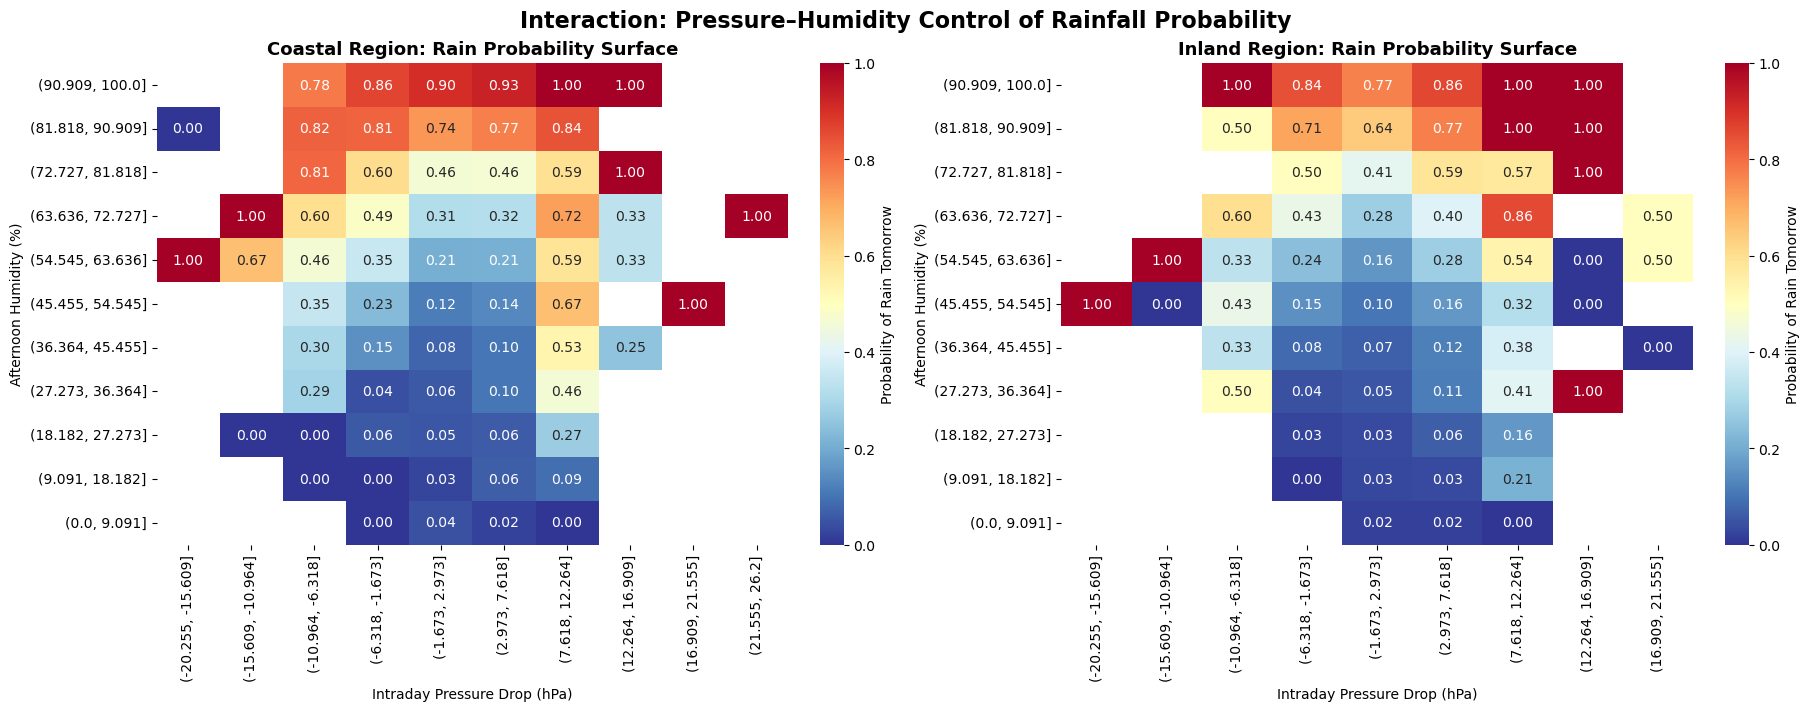

In [16]:
plot_interaction_heatmaps(df_final)

**Kiểm định kết quả theo vùng khí hậu và theo mùa**

In [17]:
def perform_checks(df: pd.DataFrame) -> None:
    fig, axes = plt.subplots(1, 2, figsize = (18, 6))
    
    # Climate Zone Sensitivity
    climate_zone_order = ['Tropical', 'Subtropical', 'Temperate', 'Grassland', 'Desert']
    available_zones = [
        z for z in climate_zone_order
        if z in df['Climate_Zone'].unique()
    ]
    zone_correlations = []
    for zone in available_zones:
        subset = df[df['Climate_Zone'] == zone]
        if len(subset) >= 100:
            corr = subset['Pressure_Drop_Day'].corr(subset['RainTomorrow_Binary'])
            zone_correlations.append(corr)
        else:
            zone_correlations.append(np.nan)

    zone_df = pd.DataFrame({
        'Climate_Zone': available_zones,
        'Correlation': zone_correlations
    })
    sns.barplot(data=zone_df, x='Climate_Zone', y='Correlation', hue='Climate_Zone', 
                palette='RdYlBu_r', legend=False, ax=axes[0])
    axes[0].axhline(0, linewidth=0.8)
    axes[0].set_title("Climate Zone Sensitivity of the Pressure Signal", fontsize=14, fontweight='bold')
    axes[0].set_xlabel("Climate Zone")
    axes[0].set_ylabel("Correlation (Pressure Drop vs Rain)")
    for i, value in enumerate(zone_correlations):
        if not np.isnan(value):
            offset = 0.01 if value > 0 else -0.02
            axes[0].text(i, value + offset, f"{value:.2f}", ha='center', fontweight='bold')

    # Season Stability
    season_order = ['Summer', 'Autumn', 'Winter', 'Spring']
    regions = ['Coastal', 'Inland']
    seasonal_corr = pd.DataFrame(index = season_order, columns = regions, dtype = float)
    for region in regions:
        for season in season_order:
            subset = df[(df['Region_Type'] == region) & (df['Season'] == season)]
            if len(subset) >= 50:
                seasonal_corr.loc[season, region] = subset['Pressure_Drop_Day'].corr(subset['RainTomorrow_Binary'])

    sns.heatmap(seasonal_corr.T, ax=axes[1], annot=True, fmt=".2f", cmap="coolwarm",
                vmin=-0.1, vmax=0.3, cbar_kws={'label': 'Correlation Coefficient'})

    axes[1].set_title("Seasonal Stability of Predictive Power", fontsize=14, fontweight='bold')
    axes[1].set_xlabel("Season")
    axes[1].set_ylabel("Region Type")
    plt.tight_layout()
    plt.show()

**Tối ưu hóa các ngưỡng áp suất có ý nghĩa thực tiễn cho từng vùng khí hậu.**

In [18]:
def find_optimal_thresholds(df: pd.DataFrame) -> pd.DataFrame:
    """
    Identify context-specific pressure drop thresholds that maximize
    F1-score for next-day rain prediction.
    """
    PRESSURE_GRID = np.linspace(-5, 10, 100)  # hPa/day
    MIN_SAMPLE_SIZE = 100
    HUMIDITY_BINS = [0, 40, 70, 100]
    HUMIDITY_LABELS = ['Low', 'Mid', 'High']

    data = df.copy()
    data['Humidity_Context'] = pd.cut(data['Humidity3pm'], bins=HUMIDITY_BINS, labels=HUMIDITY_LABELS, include_lowest=True)
    results = []

    for region in ['Coastal', 'Inland']:
        for hum in HUMIDITY_LABELS:
            subset = data[(data['Region_Type'] == region) & (data['Humidity_Context'] == hum)]
            if len(subset) < MIN_SAMPLE_SIZE:
                continue
            y_true = subset['RainTomorrow_Binary'].values
            pressure = subset['Pressure_Drop_Day'].values
            best_f1 = 0.0
            best_threshold = np.nan

            for threshold in PRESSURE_GRID:
                y_pred = (pressure > threshold).astype(int)
                tp = np.sum((y_true == 1) & (y_pred == 1))
                fp = np.sum((y_true == 0) & (y_pred == 1))
                fn = np.sum((y_true == 1) & (y_pred == 0))
                denom = (2 * tp + fp + fn)
                if denom == 0:
                    continue
                f1 = (2 * tp) / denom
                if f1 > best_f1:
                    best_f1 = f1
                    best_threshold = threshold

            results.append({
                'Region': region,
                'Humidity_Context': hum,
                'Optimal_Pressure_Drop_hPa': best_threshold,
                'Max_F1_Score': best_f1,
                'Base_Rain_Probability': y_true.mean(),
                'Sample_Size': len(subset)
            })
    results_df = pd.DataFrame(results)
    if results_df.empty:
        print("No valid operational contexts found.")
        return results_df

    # Visualization
    plt.figure(figsize=(10, 5))
    sns.barplot(data=results_df, x='Humidity_Context', y='Optimal_Pressure_Drop_hPa', hue='Region')
    plt.axhline(0, linewidth=1)
    plt.title("Operational Pressure Drop Thresholds for Rain Warning Activation")
    plt.ylabel("Optimal Pressure Drop Threshold (hPa/day)")
    plt.xlabel("Humidity Context")
    plt.tight_layout()
    plt.show()
    display(results_df
            .sort_values(['Region', 'Humidity_Context'])
            .style
            .format({
                'Optimal_Pressure_Drop_hPa': '{:.2f}',
                'Max_F1_Score': '{:.3f}',
                'Base_Rain_Probability': '{:.3f}'
            })
            .set_caption("Context-Aware Pressure Drop Thresholds Optimized for F1-Score")
    )

    return results_df

#### **C. Results & Interpretation**

#### 1. Answer the question with evidence 

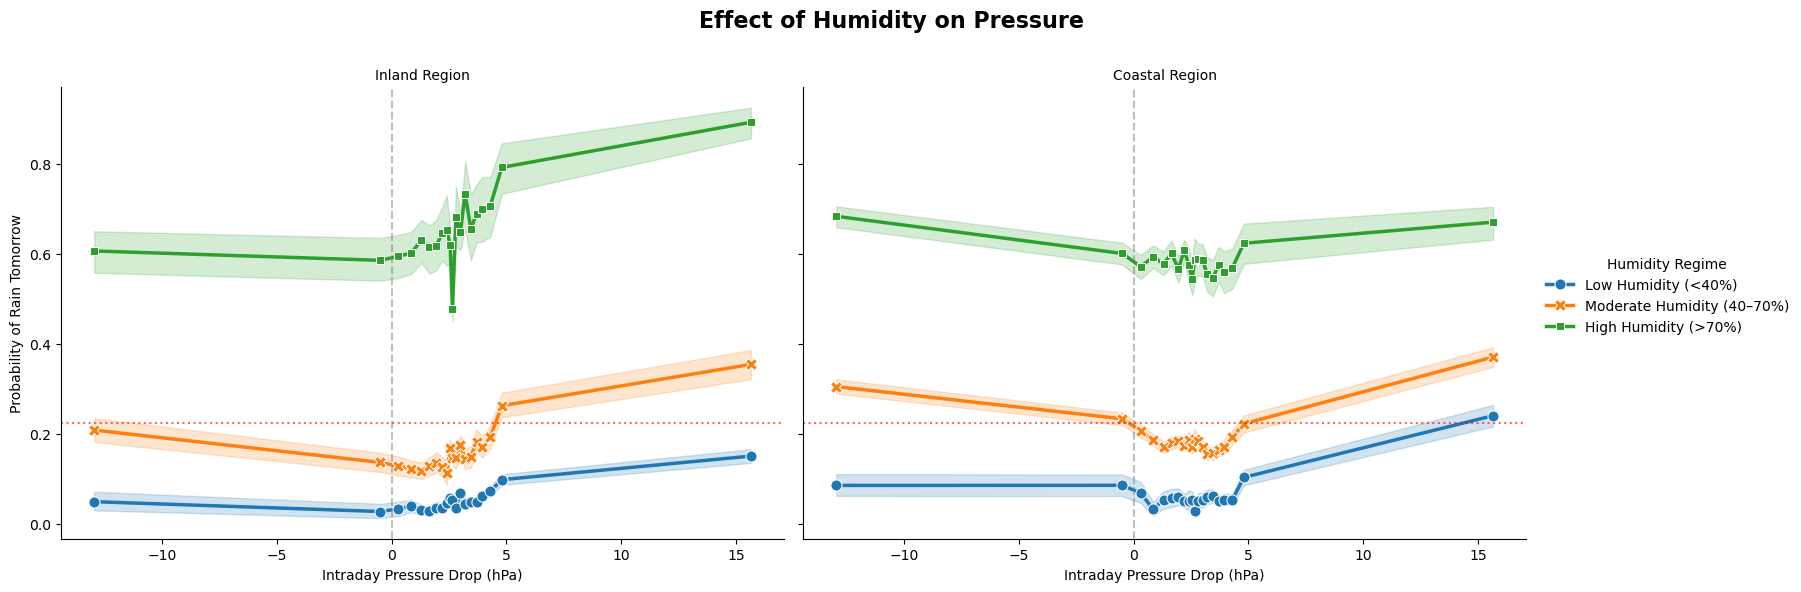

In [19]:
plot_probabilistic_interaction_curves(df_final)

Biểu đồ *Effect of Humidity on Pressure* minh họa xác suất mưa phân theo 3 chế độ độ ẩm (Thấp, Trung bình, Cao) tại hai vùng địa lý đối lập.

Phân tích các *đường cong xác suất có điều kiện* $P(\text{Rain} \mid \Delta P)$ cho thấy mối quan hệ giữa sụt giảm áp suất và xác suất mưa không mang tính tuyến tính hay phổ quát, mà bị **điều tiết mạnh bởi trạng thái ẩm của khí quyển**. Cụ thể, dữ liệu thể hiện sự phân tầng rõ rệt theo độ ẩm, trong đó tại cả hai vùng Coastal và Inland, ba đường cong tương ứng với các chế độ ẩm cao, trung bình và thấp nằm tách biệt hoàn toàn, tạo ra những cấu trúc xác suất khác nhau, ngay cả khi mức sụt giảm áp suất là tương đương. Khi độ ẩm cao (High Humidity > 70%), xác suất mưa duy trì ở mức lớn (> 60%) ngay cả trong điều kiện áp suất gần như không đổi, phản ánh trạng thái khí quyển đã gần bão hòa và chỉ cần một nhiễu động áp suất rất nhỏ cũng đủ để kích hoạt quá trình ngưng kết tạo mưa. Ngược lại, trong điều kiện độ ẩm thấp (Low Humidity < 40%), đường cong xác suất gần như phẳng, đặc biệt là ở vùng Nội địa. Điều này cho thấy khi không khí quá khô, sụt giảm áp suất đơn lẻ (dù mạnh đến đâu) không đủ để dẫn đến mưa, bất kể cường độ của nó.

Hiệu ứng điều tiết này đặc biệt rõ nét tại **vùng nội địa**. Quan sát biểu đồ bên trái (Inland Region), ta thấy một hiện tượng thú vị: Ngay cả khi áp suất giảm cực mạnh $\Delta P > 10 hPa$ – một tín hiệu thường được coi là "báo bão", nếu độ ẩm thấp (đường xanh dương), xác suất mưa vẫn *không vượt quá 15%*. Điều này phù hợp với cơ chế vật lý đặc trưng của nội địa Úc, nơi các đợt giảm áp suất trong ngày thường gắn với áp thấp nhiệt do nung nóng bề mặt, tạo ra gió và nhiễu động cơ học nhưng không kèm theo đối lưu ẩm sâu. Từ biểu đồ ta cũng thấy được sự chênh lệch giữa đường Xanh lá - khi độ ẩm cao (High Humidity > 70%) và xanh biển - khi độ ẩm thấp (Low Humidity < 40%) là cực đại.

Trái lại, tại **vùng ven biển**, nơi nguồn ẩm đại dương hiện diện thường xuyên, các đường cong xác suất có xu hướng tiệm cận nhau hơn và có điểm xuất phát cao hơn. Điều này thể hiện mối quan hệ ổn định hơn giữa áp suất và mưa. Sự tương phản này cho thấy việc áp dụng các ngưỡng dự báo dựa trên áp suất được hiệu chỉnh cho vùng ven biển vào khu vực nội địa sẽ dẫn đến tỷ lệ cảnh báo giả cao.

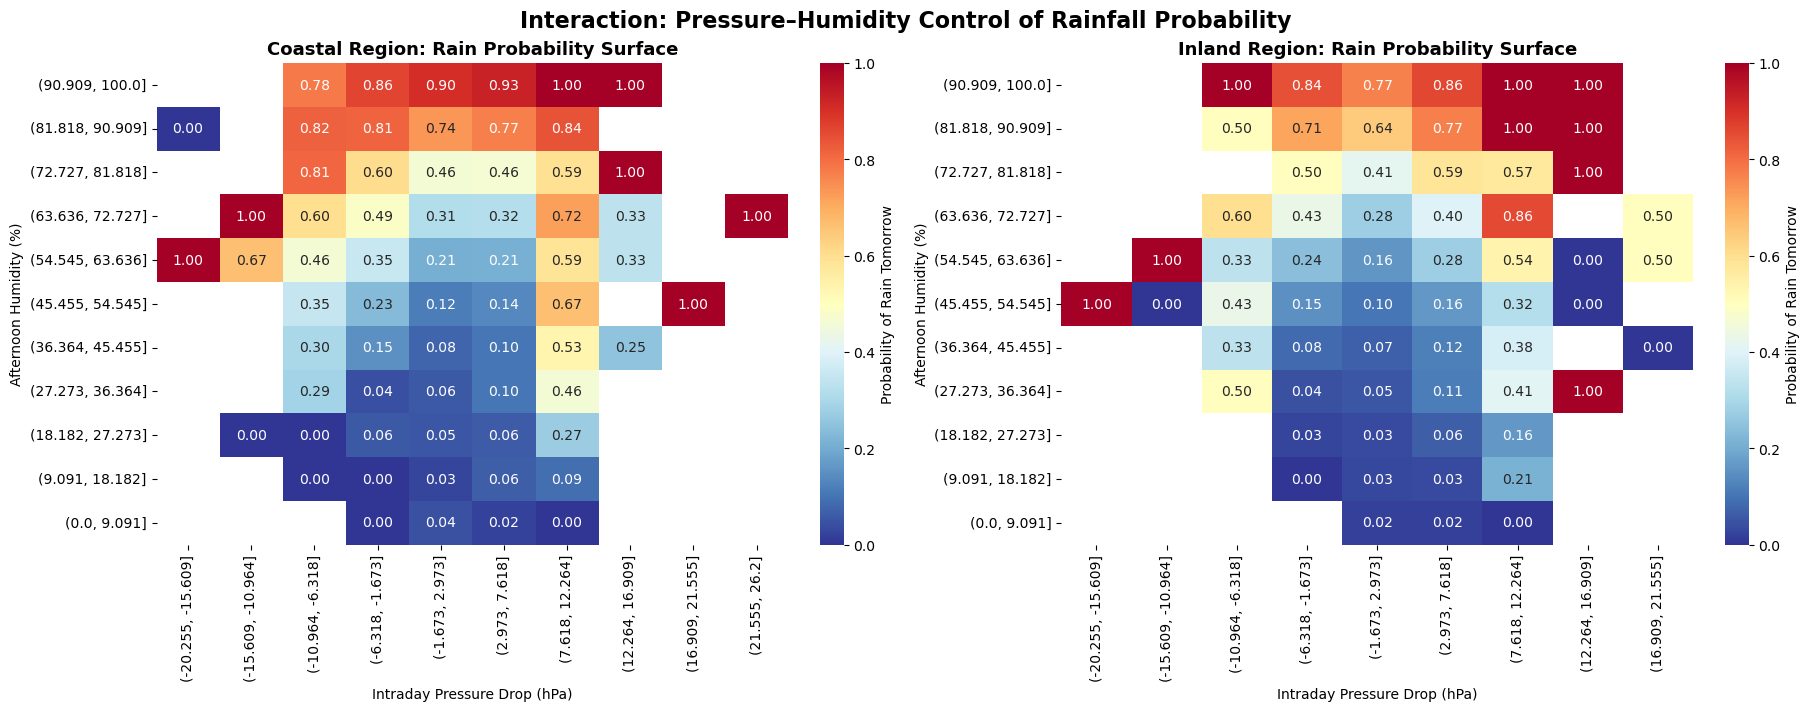

In [20]:
plot_interaction_heatmaps(df_final)

Bản đồ nhiệt tương tác (Interaction Heatmaps) cung cấp một biểu diễn hai chiều về *bề mặt xác suất mưa*, qua đó làm lộ rõ bản chất **phi tuyến và có ngưỡng** của mối quan hệ giữa sụt giảm áp suất và trạng thái ẩm khí quyển. 

Tại **vùng nội địa** (bản đồ nhiệt vùng Inland - bên phải), heatmap cho thấy sự tồn tại rõ ràng của một *"vùng cảnh báo giả"*, nơi xác suất mưa gần như bằng không mặc dù áp suất giảm rất mạnh. Cụ thể, trong góc phần tư dưới bên phải đặc trưng bởi sụt giảm áp suất lớn ($\Delta P > 5$ hPa) nhưng độ ẩm thấp (< 40%), bị bao phủ bởi màu xanh đậm, tương ứng với xác suất mưa duy trì ở mức xấp xỉ 0%. Điều này giải thích vì sao các hệ thống dự báo dựa đơn thuần trên tín hiệu áp suất thường thất bại nghiêm trọng tại các vùng khô hạn của Úc.

Ngược lại, **vùng ven biển** (bản đồ vùng Coastal - bên trái) thể hiện một bề mặt rủi ro mượt và liên tục hơn, với sự chuyển tiếp dần dần từ xác suất thấp sang cao khi cả áp suất giảm và độ ẩm cùng tăng. Điều này cho thấy tại ven biển, sự tương tác giữa áp suất và độ ẩm mang tính cộng hưởng gần tuyến tính, làm cho mối quan hệ áp suất – mưa trở nên ổn định và dễ dự báo hơn. 

**Kết luận**

Tổng hợp kết quả từ hai biểu đồ cho thấy một kết luận nhất quán và có ý nghĩa vật lý rõ ràng: **sụt giảm áp suất trong ngày $\Delta P$ không phải là một chỉ báo độc lập cho mưa**, mà chỉ phát huy hiệu lực dự báo trong những điều kiện khí quyển nhất định. Cụ thể, vai trò của $\Delta P$ bị điều tiết mạnh mẽ bởi *trạng thái ẩm của khí quyển*, với sự tồn tại của một *ngưỡng độ ẩm tới hạn* tại vùng nội địa (xấp xỉ 40 – 50%). Dưới ngưỡng này, tín hiệu áp suất gần như hoàn toàn mất ý nghĩa dự báo, ngay cả khi cường độ sụt áp rất lớn. Ngược lại, tại các vùng ven biển giàu ẩm, mối quan hệ áp suất–mưa thể hiện tính ổn định và tuyến tính hơn, phản ánh vai trò nền tảng của nguồn ẩm đại dương. Những kết quả này khẳng định rằng mối quan hệ giữa áp suất và mưa mang bản chất *phi tuyến, phụ thuộc vùng miền*, và được chi phối bởi cấu trúc ngưỡng của trường ẩm khí quyển, thay vì chỉ bởi cường độ nhiễu động động lực.

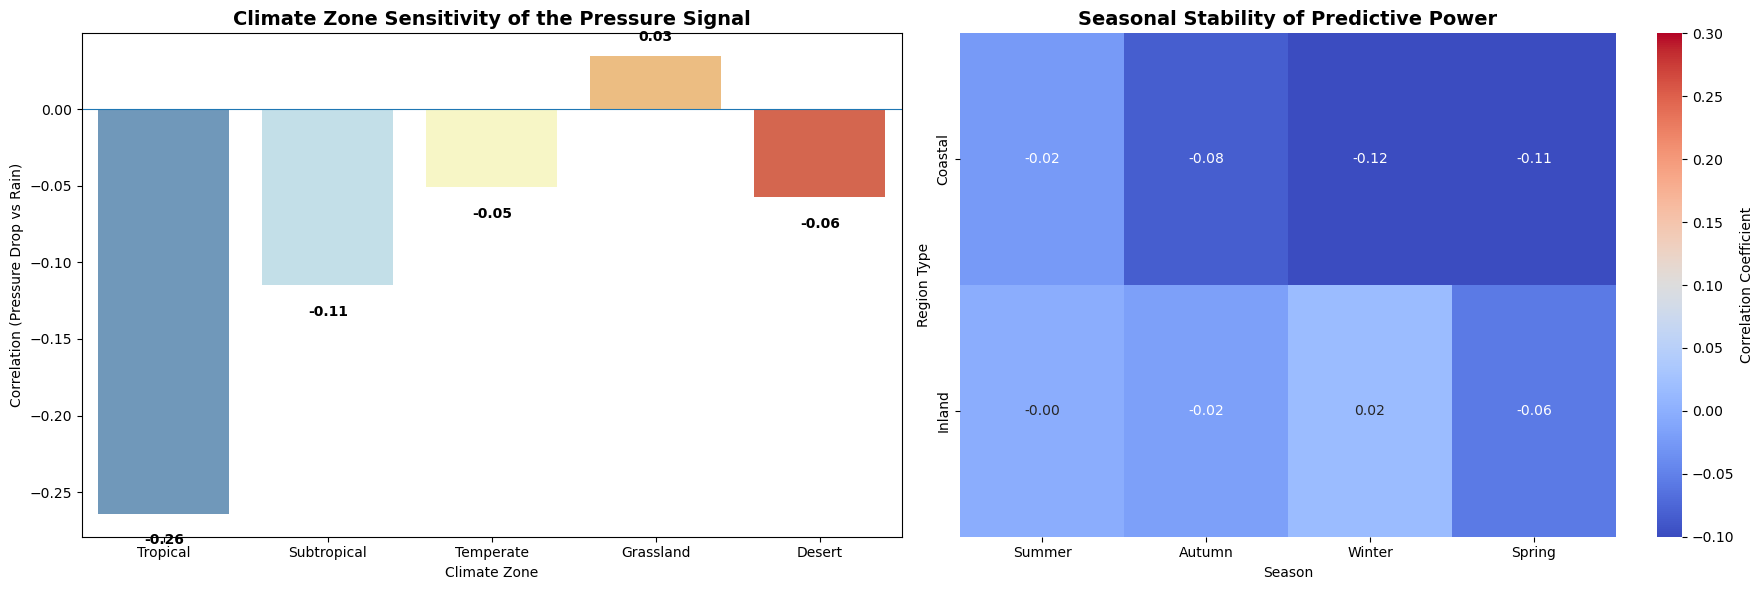

In [21]:
perform_checks(df_final)

Kết quả từ biểu đồ cột (trái) phân rã hệ số tương quan theo 5 đới khí hậu cho thấy tín hiệu áp suất hoạt động mạnh nhất tại các vùng có nguồn ẩm nền dồi dào, bao gồm *Nhiệt đới và Cận nhiệt*, nơi hệ số tương quan đạt giá trị tương đối cao (|$|r| \approx 0.1 - 0.26$). Ngược lại, tại các vùng *Thảo nguyên và Hoang mạc*, tín hiệu này không có nhiều ý nghĩa, với hệ số tương quan tiệm cận về 0 hoặc âm nhẹ. Điều này xác nhận rằng sự kém hiệu quả của các dự báo tại vùng "Inland" (Nội địa) chủ yếu bị chi phối bởi các trạm thuộc vùng khí hậu khô hạn và bán khô hạn. Sự thiếu hụt hơi nước tại đây đã cắt đứt cơ chế chuyển đổi từ "sụt áp" sang "mưa".

Kết quả từ biểu đồ nhiệt (phải) kiểm tra tính nhất quán của mối quan hệ qua 4 mùa cho thấy dự báo này bền vững theo thời gian. Trong khi vùng ven biển duy trì mối liên hệ áp suất – mưa ổn định ở mức trung bình - yếu (-0.08 đến -0.12) qua cả bốn mùa, thì vùng nội địa thể hiện hệ số tương quan dao động quanh mức 0 (-0.00 đến -0.06) một cách nhất quán quanh năm. Điều này bác bỏ hoàn toàn giả thuyết rằng tồn tại một mùa mà trong đó áp suất có thể trở thành chỉ báo hiệu quả tại nội địa. Thay vào đó, kết quả khẳng định bản chất của vấn đề là cấu trúc không gian chứ không phải tạm thời hay thời vụ. 

**Kết luận**

Sụt giảm áp suất trong ngày $\Delta P$ không phải là một chỉ báo độc lập cho mưa, mà là một quan hệ có điều kiện, bị điều khiển bởi trạng thái ẩm của khí quyển và đặc thù địa lý. 

Trong các môi trường khô hạn nội địa — đặc biệt là hoang mạc — tín hiệu này bị triệt tiêu một cách có hệ thống ngay cả khi cường độ sụt áp rất lớn do thiếu hơi nước cần thiết cho quá trình hình thành mưa. 

Ngược lại, tại các môi trường giàu ẩm như ven biển và vùng nhiệt đới, mối quan hệ áp suất – mưa thể hiện tính ổn định và tuyến tính hơn, phản ánh vai trò nền tảng của nguồn ẩm đại dương. Những kết quả này khẳng định rằng mối quan hệ giữa áp suất và mưa mang bản chất *phi tuyến, phụ thuộc vùng miền*, và được chi phối bởi cấu trúc ngưỡng của trường ẩm khí quyển.

**Đề xuất các ngưỡng tối ưu**

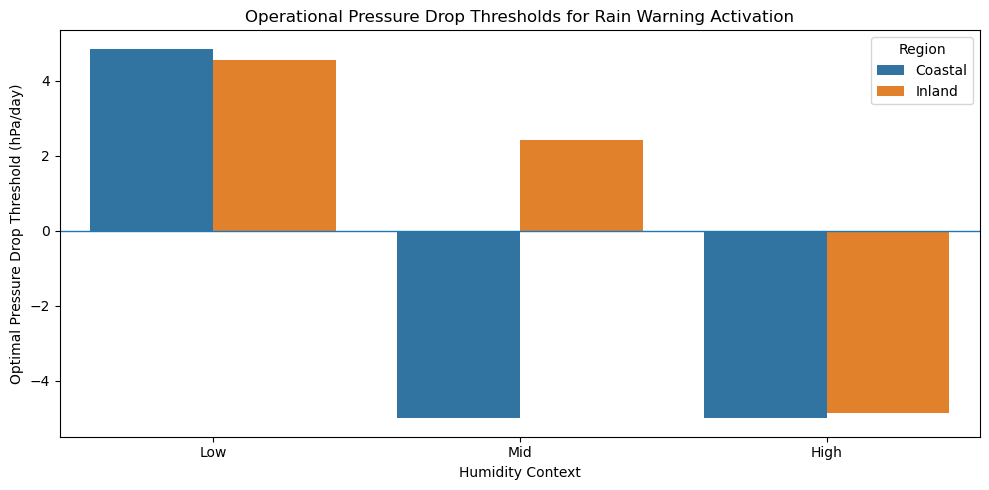

,Region,Humidity_Context,Optimal_Pressure_Drop_hPa,Max_F1_Score,Base_Rain_Probability,Sample_Size
2,Coastal,High,-5.00,0.744,0.596,18184
0,Coastal,Low,4.85,0.247,0.074,15462
1,Coastal,Mid,-5.00,0.327,0.197,52856
5,Inland,High,-4.85,0.763,0.618,6999
3,Inland,Low,4.55,0.177,0.062,27563
4,Inland,Mid,2.42,0.287,0.164,21129


In [22]:
df = find_optimal_thresholds(df_final)

Dựa trên tối ưu hóa F1-Score theo từng chế độ độ ẩm và vùng địa lý, nhóm xác định ba *chế độ dự báo phân biệt*:

Trong môi trường **độ ẩm thấp (<40%)**, cả vùng ven biển và nội địa đều cho thấy ngưỡng áp suất tối ưu rất cao (xấp xỉ +4.5 đến +4.8 hPa) nhưng hiệu năng dự báo vẫn thấp, cho thấy đây là trạng thái mà tín hiệu áp suất đóng vai trò như nhiễu; chiến lược tối ưu trong trường hợp này là triệt tiêu cảnh báo để tránh bùng nổ báo động giả. 

Ở **vùng độ ẩm trung bình (40 – 70%)**, xuất hiện sự phân hóa rõ rệt: tại nội địa, hệ thống chỉ nên kích hoạt cảnh báo khi sụt giảm áp suất vượt ngưỡng đáng kể ($\approx$ +2.5 hPa), trong khi tại ven biển, ngưỡng áp suất có thể được nới lỏng đáng kể do xác suất mưa nền đã tương đối cao. 

Cuối cùng, trong trạng thái **độ ẩm cao (>70%)**, tín hiệu dự báo đạt mức bão hòa: xác suất mưa nền tăng mạnh và F1-Score đạt giá trị tối ưu, khiến vai trò của $\Delta P$ trở nên thứ yếu, ít quan trọng.

Vì thế, không thể sử dụng một ngưỡng áp suất đơn lẻ (ví dụ: $\Delta P > 3$ hPa) cho toàn lãnh thổ Úc mà ngưỡng áp suất phải được điều chỉnh linh hoạt theo độ ẩm và đặc thù địa lý để dự đoán chính xác.

#### 2. Practical Meaning & Implications

Các kết quả của câu hỏi có ý nghĩa giúp:

* Nhận biết được cách tiếp cận dự báo đồng nhất trên toàn lãnh thổ nước Úc là không phù hợp.
* Đề xuất khung dự báo thích ứng theo vùng:

  * *Coastal/Tropical regions:* Tín hiệu áp suất duy trì giá trị dự báo -> mô hình tuyến tính/threshold truyền thống vẫn khả thi.
  * *Inland/Desert regions:* Áp suất chỉ có ý nghĩa khi độ ẩm vượt ngưỡng tới hạn (~40%) -> cần mô hình phi tuyến với cơ chế *humidity gating*.
* Giảm chi phí kinh tế do cảnh báo giả, hạn chế các quyết định ứng phó tốn kém nhưng không cần thiết trong nông nghiệp và quản lý thiên tai.

* Chiến lược đầu tư hạ tầng: ưu tiên tăng cường đo đạc độ ẩm và điểm sương tại các vùng Grassland và Desert sẽ mang lại lợi suất cải thiện dự báo cao hơn so với việc tiếp tục mở rộng mạng lưới cảm biến áp suất vốn đã bão hòa thông tin.

#### 3. Surprises & Limitations

**Key Surprise:** Một phát hiện đáng chú ý của câu hỏi là sự tồn tại phổ biến của hiện tượng "áp thấp giả" tại vùng nội địa — những thời điểm áp suất giảm rất mạnh nhưng hoàn toàn không đi kèm mưa. Hiện tượng này làm nổi bật sự khác biệt vật lý giữa áp thấp nhiệt lực, chủ yếu gây gió và bụi do nung nóng bề mặt, và áp thấp động lực gắn liền với hội tụ ẩm và kết tủa. Đây chính là “bẫy dữ liệu” then chốt khiến các mô hình dự báo ngây thơ, vốn giả định mối quan hệ phổ quát giữa sụt áp và mưa, thất bại một cách có hệ thống.

**Main Limitations**

* Point-based data: dữ liệu weatherAUS có bản chất điểm đo (point-based), trong khi mưa là hiện tượng không gian có tính cục bộ cao, dẫn đến khả năng gán nhãn sai cho một số trường hợp. 
* Thiếu dữ liệu tầng cao: Không phân biệt đầy đủ cơ chế động lực gây sụt áp.
* Độ phân giải thời gian thấp (9am – 3pm): Bỏ lỡ các biến động nhanh trong ngày.